In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72

import pandas as pd
import seaborn as sns


from sklearn.ensemble import GradientBoostingClassifier

In [4]:
training_df = pd.read_csv("./titanic/train.csv")
testing_df = pd.read_csv("./titanic/test.csv")

In [5]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
testing_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### How important was Age in survival?

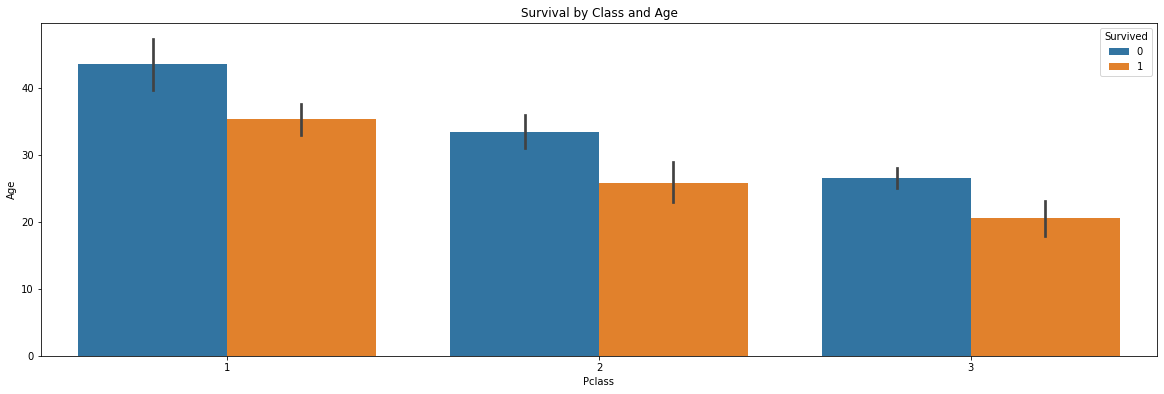

In [16]:
plt.figure(figsize=(20,6))
sns.barplot(x = "Pclass", y = "Age", hue = "Survived", data = training_df)
plt.title("Survival by Class and Age")
plt.show()

##### What about sex?

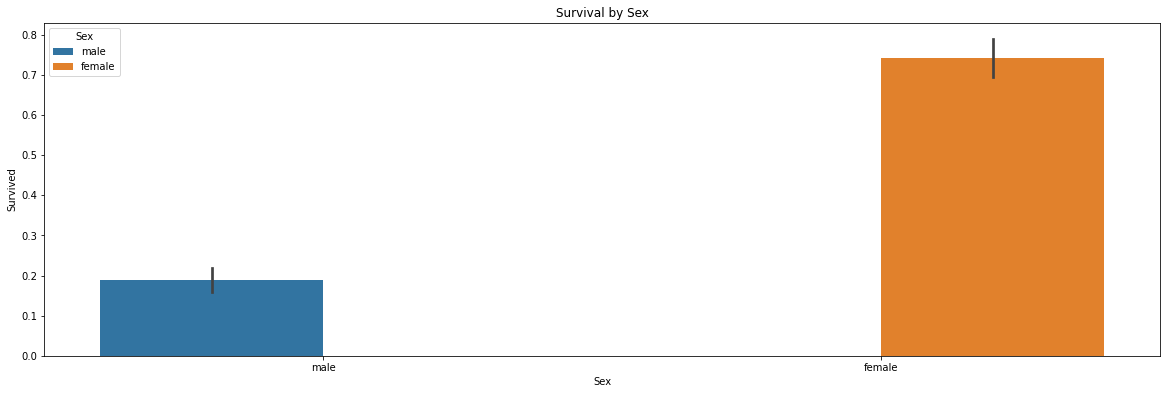

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(x = "Sex", y = "Survived", hue = "Sex", data = training_df)
plt.title("Survival by Sex")
plt.show()

In [79]:
training_df.groupby("Sex").Survived.mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


74% of women survived, while ~19% of men survived

##### Does Class make a difference in survival rate?

In [80]:
training_df.groupby("Pclass").Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Yes, makes a huge difference (shocker).

##### Was gender the biggest determinator of death though? Let's see...

In [75]:
women_survived = len(training_df[(training_df["Sex"]=='female') & (training_df["Survived"] == 1)])
men_survived = len(training_df[(training_df["Sex"]=='male') & (training_df["Survived"] == 1)])
print(f'Number of women who survived: {women_survived} | men: {men_survived}\n')

print(f'Number of: {training_df["Sex"].value_counts()}\n')

print(f'Number who Survived: {training_df["Survived"].value_counts()}\n')

print(f'Percent of people who survied: {training_df["Survived"].value_counts(normalize=True)}')

Number of women who survived: 233 | men: 109

Number of: male      577
female    314
Name: Sex, dtype: int64

Number who Survived: 0    549
1    342
Name: Survived, dtype: int64

Percent of people who survied: 0    0.616162
1    0.383838
Name: Survived, dtype: float64


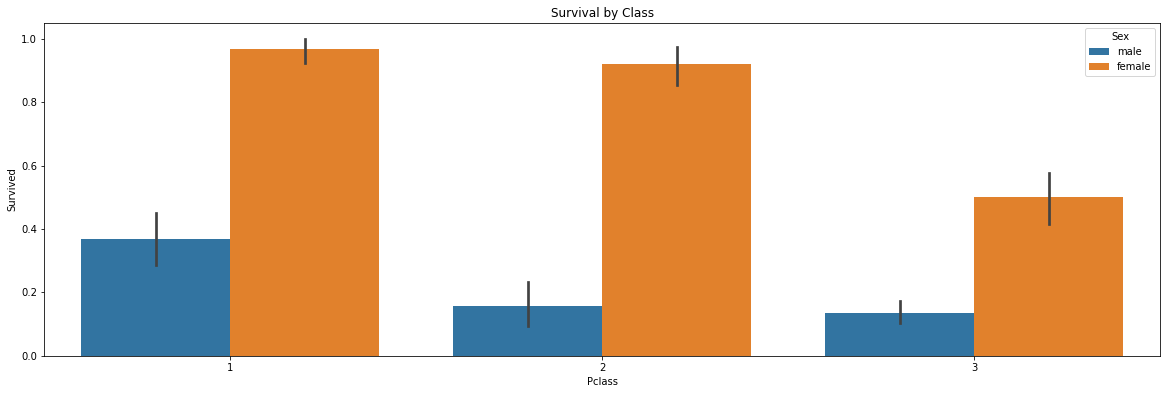

In [84]:
plt.figure(figsize=(20,6))
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = training_df)
plt.title("Survival by Class")
plt.show()

In [83]:
training_df.groupby(["Pclass", "Sex"]).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

Clearly there is an effect on the survival rate based on which class ticket a person had, but it is obvious by far the most important factor was sex

##### What is the Age distribution?

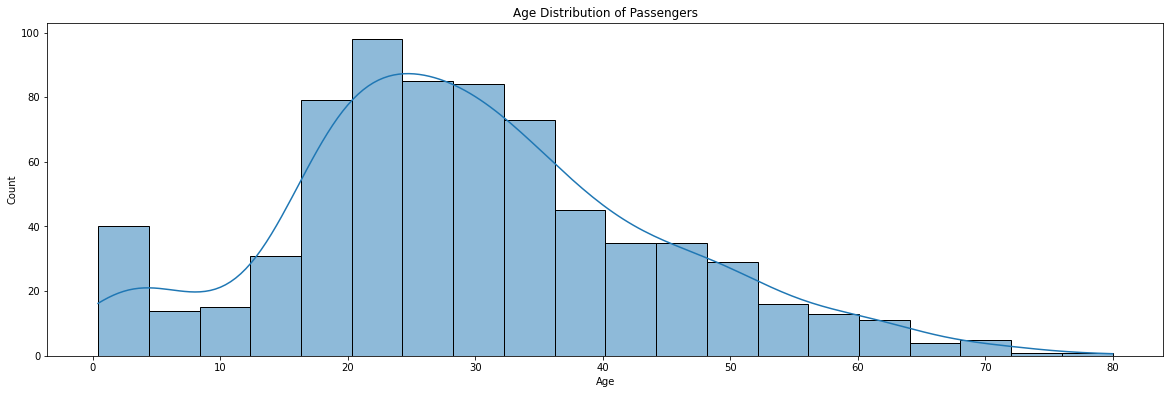

In [88]:
plt.figure(figsize=(20,6))
sns.histplot(training_df["Age"], kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

Seems to be a relatively normal distribution, with very few old people, and a low-to-moderate amount of children. Was there an increase in liklihood of survival for children, however?

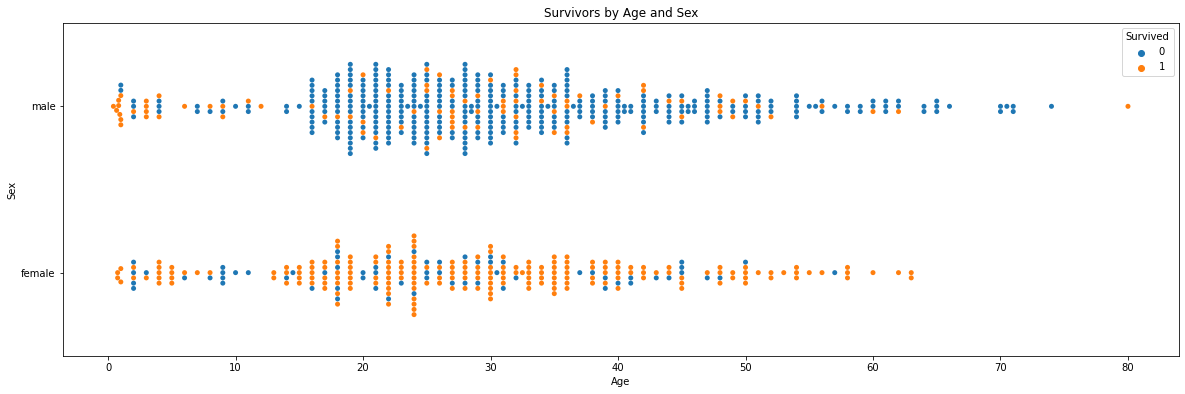

In [90]:
plt.figure(figsize=(20,6))
sns.swarmplot(x="Age", y="Sex", hue="Survived", data=training_df)
plt.title("Survivors by Age and Sex")
plt.show()

Yes, very clearly you can see on the left hand side of this swarm plot that children (even males) were MUCH more likely to have survived than the rest of the population.

So, Age and Sex are clearly the two most important features of this dataset. What about price paid for a ticket?

In [91]:
training_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

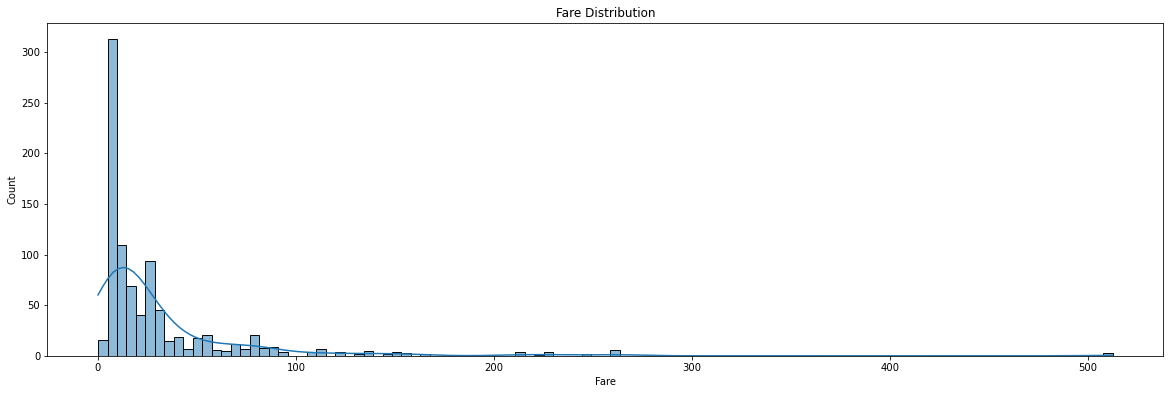

In [93]:
plt.figure(figsize=(20,6))
sns.histplot(training_df["Fare"], kde=True)
plt.title("Fare Distribution")
plt.show()

This is not a normal distribution, with fares heavily skewed to the lower end. This means this is a good candidate for binning these, and then comparing them to the survival rate. Lets do that and see what happens

In [ ]:
fare_bucket_names = ["Cheap", "Normal", "Pricey", "Expensive"]



In [52]:
def create_submission(classifier, X, y, X_test):
    classifier.fit(X, y)
    y_pred = classifier.predict(X_test)

    output = pd.DataFrame({'PassengerId': testing_df.PassengerId, 'Survived': y_pred})
    output.to_csv('submission.csv', index=False)
    print("Your submission was successfully saved!")

In [76]:
# features_to_use = ["Pclass", "Sex", "SibSp", "Parch"]
features_to_use = ["Pclass", "Sex", "Fare"]
# features_to_use = ["Pclass", "Sex", "SibSp", "Parch"]

# numerical_data = training_df[["Fare"]].values

# Replace the original numerical feature with the scaled values in the DataFrame
# training_df["Fare"] = StandardScaler().fit_transform(numerical_data)

X = pd.get_dummies(training_df[features_to_use])
y = training_df["Survived"]

X_test = pd.get_dummies(testing_df[features_to_use])

create_submission(GradientBoostingClassifier(max_depth=5, random_state=1), X, y, X_test)

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values